In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1

In [6]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
# Scaling
x_train1 = x_train.astype('float32') / 255
x_test1 = x_test.astype('float32') / 255

x_train = x_train1.reshape((60000, 28*28))
x_test = x_test1.reshape((10000, 28*28))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# Initilize AutoEncoder
input_size = 784    # 28 * 28
hidden_size = 128
code_size = 32      # latent vector

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)

In [10]:
# Fit the AutoEncoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0248
Epoch 2/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0128
Epoch 3/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0113


In [11]:
# Predict the test set
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs = decoded_imgs.reshape((10000, 28, 28))
print(decoded_imgs.shape)

313/313 [==============================] - 1s 3ms/step
(10000, 28, 28)


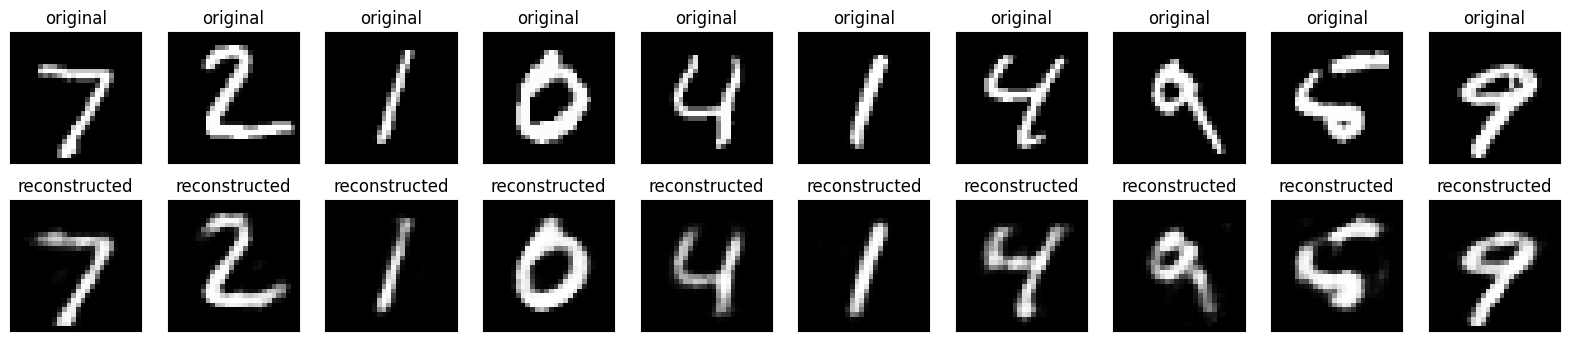

In [15]:
# Compare original images and decoded images
n = 10
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test1[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
# Classification with representation vector
encoder = Model(inputs=input_img, outputs=code)     # only encoder
x_train_encode = encoder.predict(x_train)
x_test_encode = encoder.predict(x_test)
print(x_train_encode.shape)

313/313 [==============================] - 1s 2ms/step
(60000, 32)


In [18]:
# One-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [19]:
# Initialize FNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_encode.shape[1],)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 5514 (21.54 KB)
Trainable params: 5514 (21.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Fit the FNN model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_encode, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.7171 - accuracy: 0.7825 - val_loss: 0.3311 - val_accuracy: 0.9009
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8975 - val_loss: 0.2838 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.9184 - val_loss: 0.2227 - val_accuracy: 0.9324
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2312 - accuracy: 0.9283 - val_loss: 0.2135 - val_accuracy: 0.9372
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2006 - accuracy: 0.9382 - val_loss: 0.1757 - val_accuracy: 0.9477
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1801 - accuracy: 0.9447 - val_loss: 0.1862 - val_accuracy: 0.9442
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1651 - accuracy: 0.9489 - val_loss: 0.1556 - val_accuracy: 0.9526
Epoch 